# Лабораторная работа №1. 

Данная лабораторная работа состоит из нескольких блоков. В каждом блоке вам предлагается произвести некоторые манипуляции с данными и сделать некоторые выводы.
* Задавать вопросы можно и нужно.
* Списывать не нужно. Работы, которые были списаны обнуляются.
* Блоки выполняются последовательно и оцениваются отдельно.

## Часть 1. Работа с моделями и ансамблями моделей в задачи классификации.

### 1. Чтение данных.
Воспользуемся [датасетом](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), в котором описываются различные автомобили. Будем решать задачу многоклассовой ($k=4$) классификации.
Для удобства, датасет уже преобразован в удобный формат.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


Для первичного анализа может быть полезна библиотека `pandas`. Преобразуем `train` выборку в `pd.DataFrame`.

In [2]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,648,105,53,105,184,57,11,211,31,24,168,224,661,218,71,0,15,186,197
1,556,108,56,102,246,75,6,239,28,26,167,264,855,228,82,9,13,186,185
2,512,103,54,107,189,56,11,223,30,25,174,225,729,200,70,0,29,187,201
3,126,89,42,70,148,62,7,147,45,19,143,176,323,153,76,2,6,186,189
4,309,109,48,107,215,62,10,205,32,23,158,222,624,168,65,9,32,195,206
5,117,109,53,109,221,69,12,221,31,25,169,226,712,212,72,13,28,188,201
6,300,106,53,98,193,60,10,215,31,24,169,224,681,218,73,8,21,188,197
7,28,102,45,85,193,64,6,192,33,22,146,217,570,163,76,6,7,195,193
8,435,85,37,68,145,60,6,130,51,18,130,150,253,121,65,3,14,195,203
9,442,91,36,60,126,56,6,119,56,17,130,139,211,118,67,6,14,192,198


Воспользовавшись методами `describe` и `info` можно получить полезную информацию о датасете.

In [3]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,415.967213,93.550091,44.757741,81.721311,167.867031,61.573770,8.551913,167.823315,41.185792,20.506375,147.734062,187.612022,434.617486,174.424408,72.515483,6.256831,12.559199,188.644809,195.391621
std,243.496090,8.204711,6.092472,16.005380,33.985755,7.658813,4.540525,33.148027,7.836031,2.586894,14.253004,31.097749,175.863156,32.126407,7.257656,4.824433,8.960510,5.936977,7.330419
min,0.000000,78.000000,33.000000,42.000000,104.000000,47.000000,2.000000,114.000000,26.000000,17.000000,118.000000,131.000000,191.000000,109.000000,59.000000,0.000000,0.000000,176.000000,182.000000
25%,207.000000,87.000000,40.000000,70.000000,140.000000,57.000000,7.000000,145.000000,33.000000,19.000000,137.000000,167.000000,314.000000,150.000000,67.000000,2.000000,6.000000,184.000000,190.000000
50%,401.000000,93.000000,44.000000,78.000000,164.000000,61.000000,8.000000,156.000000,43.000000,19.000000,146.000000,176.000000,358.000000,173.000000,72.000000,6.000000,11.000000,188.000000,196.000000
75%,628.000000,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,216.000000,584.000000,198.000000,75.000000,9.000000,18.000000,193.000000,201.000000
max,845.000000,119.000000,59.000000,112.000000,322.000000,133.000000,55.000000,262.000000,59.000000,28.000000,188.000000,288.000000,998.000000,268.000000,127.000000,22.000000,39.000000,204.000000,210.000000


In [4]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
0     549 non-null int64
1     549 non-null int64
2     549 non-null int64
3     549 non-null int64
4     549 non-null int64
5     549 non-null int64
6     549 non-null int64
7     549 non-null int64
8     549 non-null int64
9     549 non-null int64
10    549 non-null int64
11    549 non-null int64
12    549 non-null int64
13    549 non-null int64
14    549 non-null int64
15    549 non-null int64
16    549 non-null int64
17    549 non-null int64
18    549 non-null int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Работа с данными, построение модели, анализ ошибки.
Выполните следующие манипуляции с данными:

#### 2.0. Предобработка данных.
* Произведите необходимые (по вашему мнению) манипуляции с данными и объясните их.

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# избавляемся от потенциальных выбросов
inliers = IsolationForest().fit_predict(X_train) == 1
X_train, y_train = X_train[inliers], y_train[inliers]

# скалируем выборку
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### 2.1. Базовая логистическая регрессия.
* Подберите оптимальные параметры логистической регресии с помощью кросс-валидации на train-датасете (е переусердствуйте с подбором, в данной работе не стоит задача найти самую оптимальную модель. Небольшого grid/random search'а хватит).

* Постройте график ROC-кривой для данного классификатора (`sklearn.metrics.roc_curve`), оцените точность классификации и f1-score. 

In [7]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

def _key_for_param(param):
    return 'param_{}'.format(param)

def _plot_group(ax, group, change, title=None):
    ax.plot(group[_key_for_param(change)], group['mean_test_score'])
    ax.set_xlabel(change)
    ax.set_ylabel('mean test score')
    ax.set_title(title)
    ax.grid()
    

def _plot_one_param(grid_res, change):
    fig = plt.figure(figsize=(5, 5))
    ax = fig.gca()
    _plot_group(ax, grid_res, change)
    fig.show()
    
def _plot_two_params(grid_res, change, params):
    other = [param for param in params.keys() if param != change][0]
    grouped = grid_res.groupby([_key_for_param(other)])
    n = len(grouped)
    
    fig, axs = plt.subplots(n, figsize=(5, 5 * n))
    for ax, (index, group) in zip(axs, grouped):
        _plot_group(ax, group, change, '{} = {}'.format(other, index))
        
    fig.show()

def plot_grid_res(grid_res, params, change):
    if len(params) == 1:
        _plot_one_param(grid_res, change)
    elif len(params) == 2:
        _plot_two_params(grid_res, change, params)
    else:
        return # don't handle such cases

def grid_search(X, y, model, params, change):
    grid = GridSearchCV(estimator=model, 
                        param_grid=params, 
                        scoring='precision_macro', 
                        cv=StratifiedKFold(n_splits=5, random_state=42))
    grid.fit(X, y)
    plot_grid_res(pd.DataFrame(grid.cv_results_), params, change)
    return grid.best_params_

In [8]:
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt

lr = LogisticRegression(random_state=42)
params = {
    'penalty': ['l1', 'l2'],
    'C': np.linspace(0.01, 1, num=10)
}
lr_best_params = grid_search(X_train, y_train, lr, params, 'C')

In [ ]:
from sklearn.metrics import roc_curve, precision_score, f1_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelBinarizer

def eval_metrics(y_true, y_pred):
    print('precision = {}, f1 = {}'.format(precision_score(y_true, y_pred, average='macro'), 
                                           f1_score(y_true, y_pred, average='macro')))

def plot_roc_curve(X_train, X_test, y_train, y_test, estimator):
    lb = LabelBinarizer()
    y_train_lb = lb.fit_transform(y_train)
    y_test_lb = lb.transform(y_test)

    n_classes = y_train_lb.shape[1]
    model = OneVsRestClassifier(estimator)
    y_score_lb = model.fit(X_train, y_train_lb).decision_function(X_test)
    y_pred_lb = model.predict(X_test)
    eval_metrics(y_test_lb, y_pred_lb)

    fig, axs = plt.subplots(n_classes, figsize=(5, 5 * n_classes))
    for ax, test, score in zip(axs, y_test_lb.T, y_score_lb.T):
        fpr, tpr, _ = roc_curve(test, score)
        ax.plot(fpr, tpr)
        ax.set_xlabel('fpr')
        ax.set_ylabel('tpr')
        ax.grid()

    fig.show()

precision = 0.7179165285906219, f1 = 0.6989816614666338


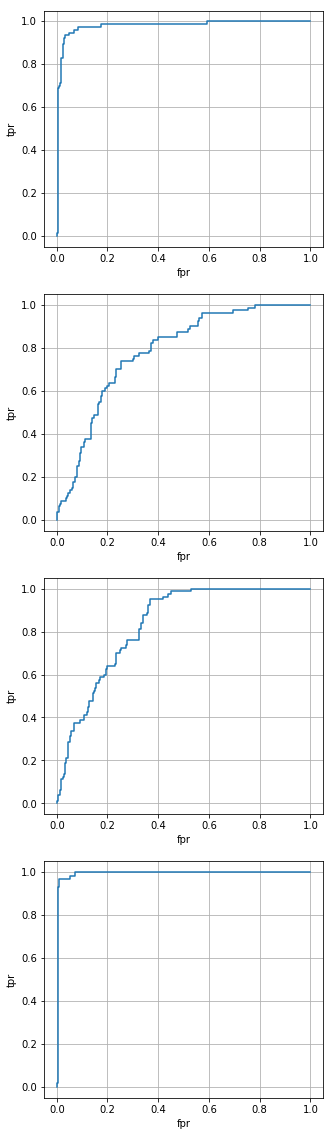

In [ ]:
plot_roc_curve(X_train, X_test, y_train, y_test, LogisticRegression(**lr_best_params, random_state=42))

#### 2.2. Зависимость объясненной дисперсии от числа главных компонент.
Воспользуемся методом главных компонент (PCA). 

Примените его к train-части данных.
Постройте график зависимости объясненной дисперсии (explained variance ratio) от количества главных компонент.

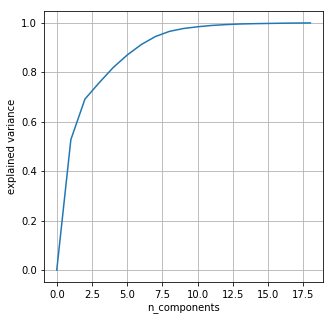

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(random_state=42).fit(X_train)
var = pca.explained_variance_ratio_

fig = plt.figure(figsize=(5,5))
ax = fig.gca()

ax.plot([sum(var[:i]) for i in range(len(var))])
ax.set_ylabel('explained variance')
ax.set_xlabel('n_components')
ax.grid()

fig.show()

#### 2.3. Преобразование с помощью PCA.
Выберите определенное число компонент. Кратко опишите, чем обусловлен ваш выбор.

Используя эти главные компоненты, преобразуйте train и test выборки (используя методы `fit` и `transform`).

In [ ]:
n_components = 13
model = PCA(n_components=n_components, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

#### 2.4. Логистическая регрессия над преобразованными данными.
* Подберите оптимальные параметры логистической регресии с помощью кросс-валидации на преобразованном train-датасете.

* Постройте график ROC-кривой для полученных классификаторов, оцените точность классификации и f1-score. 

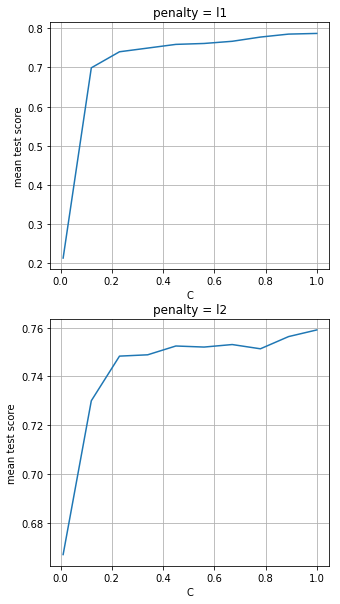

In [ ]:
model_pca = LogisticRegression(random_state=42)
params_pca = {
    'penalty': ['l1', 'l2'],
    'C': np.linspace(0.01, 1, num=10)
}
lr_best_params_pca = grid_search(X_train_pca, y_train, model_pca, params, 'C')

precision = 0.7160998199193083, f1 = 0.6934414285556414


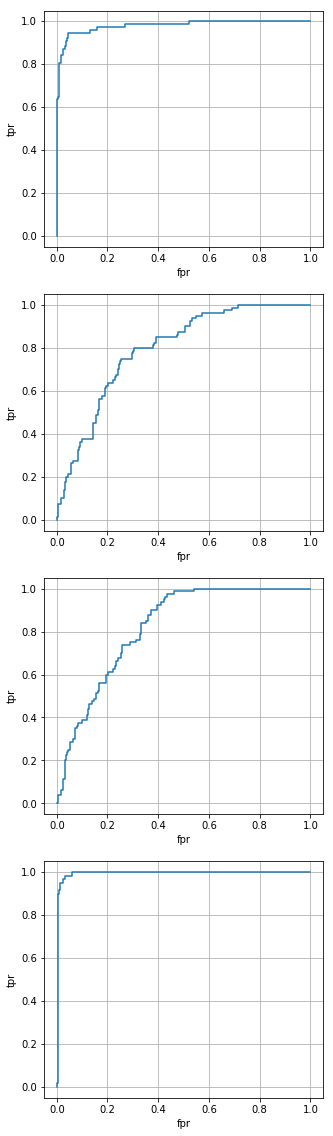

In [ ]:
plot_roc_curve(X_train_pca, X_test_pca, y_train, y_test, LogisticRegression(**lr_best_params_pca, random_state=42))

#### 2.5. Решающее дерево.
Рассмотрим поведение решающего дерева на исходных и преобразованных данных. Будем варьировать лишь один параметр - максимальную глубину дерева. 

* С помощью кросс-валидации подберите оптимальный параметр `max_depth` и оцените на исходных и преобразованных данных те же метрики, что и выше.

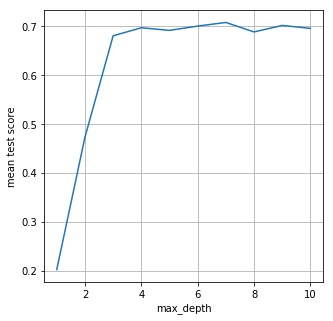

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
params = {
    'max_depth': np.arange(1, 11),
}
dtc_best_params = grid_search(X_train, y_train, model, params, 'max_depth')

#### 2.6. Bagging.
Перейдем к ансамблям. 

Для построения ансамбля воспользуемся Bagging'ом с числом алгоритмов от 2 до 50. В качестве первого семейства базовых алгоримтов будем использовать линейные модели (т.е. логистическую регрессию), в качестве второго - решающие деревья. 

*Пояснение: Будем строить ансамбль только из моделей из одного семейства, т.е. логистическая регрессия не смешивается с решающими деревьями.*

Для этого можно сгенерировать с помощью метода bootstrap 50 подвыборок из `train` выборки (того же размера, что и исходная), обучить логистическую регрессию и решающее дерево с оптимальными параметрами из предыдущего пункта на каждой из подвыборок и затем усреднить предсказания k моделей.

*Hint: в sklearn может найтись подходящая функция, которая облегчит вам реализацию данного пункта.*

* Постройте график качества классификации и f1-score на `train` и `test` датасетах в зависимости от числа алгоритмов, вошедших в ансамбль.

* Проанализируйте график. Какое количество моделей стоит использовать? Как вы думаете, являются ли параметры решающего дерева, подобранные в предыдущем пункте оптимальными в данном случае?

precision = 0.7396157205312545, f1 = 0.7443600501210128


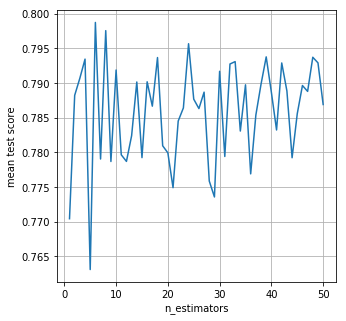

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score

model = BaggingClassifier(base_estimator=LogisticRegression(**lr_best_params))
params = {
    'n_estimators': np.arange(1, 51)
}
lr_bagging_best_params = grid_search(X_train, y_train, model, params, 'n_estimators')
best_model = BaggingClassifier(base_estimator=LogisticRegression(**lr_best_params), **lr_bagging_best_params)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
eval_metrics(y_test, y_pred)

In [ ]:
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(**dtc_best_params))
params = {
    'n_estimators': np.arange(1, 51)
}
dtc_bagging_best_params = grid_search(X_train, y_train, model, params, 'n_estimators')
best_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(**dtc_best_params), **dtc_bagging_best_params)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
eval_metrics(y_test, y_pred)

#### 2.7. Random Forest.
Теперь воспользуйтесь `sklearn`-реализацией алгоритма Random Forest. 

* Постройте аналогичные графики для него (изменяя число деревьев от 1 до 50). Остальные параметры можно оставить по умолчанию.

* Проанализируйте полученные результаты. Каким получилось оптимальное число деревьев. Как оно соотносится с оптимальным числом деревьев и линейных моделей в bagging'е из предыдущего пункта?

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
params = {
    'n_estimators': np.arange(1, 51)
}
rfc_best_params = grid_search(X_train, y_train, model, params, 'n_estimators')
best_model = RandomForestClassifier(**rfc_best_params)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
eval_metrics(y_test, y_pred)

#### 2.8. Кривая обучения.
* Поделите обучающую выборку на 10 примерно равных частей. Обучите логистическую регрессию (с оптимальными параметрами), решающее дерево (аналогично), бэггинг над логистическими регрессиями и решающими деревьями (с выбранными параметрами) и RandomForest (из предыдущего пункта) на одной, двух, трех и т.д. частях.

* Постройти график f1-score и accuracy на `train` и `test` датасетах в зависимости от размера обучающей выборки.

* Проанализируйте полученный график. Можно ли сделать из него какие-либо выводы? Если да - кратко опишите их.

In [ ]:
import copy

def precision_from_train_size(X_train, X_test, y_train, y_test, model):
    precision, f1 = [], []
    all_train = []
    cv = StratifiedKFold(n_splits=10, random_state=42)
    for train, test in cv.split(X_train, y_train):
        all_train.extend(test) # test is stratified portion of 1/10 of data
        model_copy = copy.deepcopy(model)
        model_copy.fit(X_train[all_train], y_train[all_train])
        y_pred = model_copy.predict(X_test)
        precision.append(precision_score(y_test, y_pred, average='macro'))
        f1.append(f1_score(y_test, y_pred, average='macro'))
    
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    for ax, metric, title in zip(axs, [precision, f1], ['precision', 'f1']):
        ax.plot(metric)
        ax.set_xlabel('part of dataset')
        ax.set_ylabel('test score')
        ax.set_title(title)
        ax.grid()
    
    fig.show()

In [ ]:
precision_from_train_size(X_train, X_test, y_train, y_test, LogisticRegression(**lr_best_params))

In [ ]:
precision_from_train_size(X_train, X_test, y_train, y_test, DecisionTreeClassifier(**dtc_best_params))

In [ ]:
precision_from_train_size(X_train, X_test, y_train, y_test, 
                          BaggingClassifier(base_estimator=LogisticRegression(**lr_best_params), 
                                            **lr_bagging_best_params))

In [ ]:
precision_from_train_size(X_train, X_test, y_train, y_test,
                          BaggingClassifier(base_estimator=DecisionTreeClassifier(**dtc_best_params), 
                                            **dtc_bagging_best_params))

In [ ]:
precision_from_train_size(X_train, X_test, y_train, y_test,
                          RandomForestClassifier(**rfc_best_params))

Вторая часть задания про SVM ждет вас в соседнем ноутбуке.